In [19]:
import numpy as np
import utils 
import pandas as pd 
from sklearn.impute import * 

Okay the goal is to generate causal data on a very small dataset where

A -> B 

A -> C -> D

with the following equation set 

$$ A \sim N(1,1) $$ 
$$ B = A + A^2 + N(0,1) $$ 
$$ C = A^3 + N(0,1) $$ 
$$ D = C^2 + 1 + N(0,1) $$ 

In [20]:
utils.generate_full_data(1000, True, "test1")

array([[ 7.47792005e-01,  1.04063206e+00,  1.34658608e+00,
         3.73602557e+00],
       [ 1.55675652e+00,  4.80294069e+00,  4.41889626e+00,
         2.02777139e+01],
       [ 1.00952758e+00,  1.30662305e+00,  1.64027714e+00,
         3.93049971e+00],
       ...,
       [ 4.27682857e-01, -6.37017411e-01,  1.20780431e+00,
         1.91250488e+00],
       [-2.87496253e-01,  7.35530104e-01,  1.21746230e-02,
         1.11632005e+00],
       [ 7.12061575e-01,  1.68442415e-01,  2.25617161e+00,
         6.28431167e+00]])

In [21]:
data = np.loadtxt("./gen_data/test1.csv", delimiter = ",")

In [22]:
data.shape

(1000, 4)

In [23]:
mcar_data = utils.v_induce_missing_data(data, 0.2)

In [24]:
mcar_data.shape

(1000, 4)

so next I am checking approx what percentage of the data is missing, I should also look for any complete cases next 

In [54]:
np.sum(np.isnan(mcar_data)) / (data.shape[0]* data.shape[1])

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [56]:
mcar2 = pd.DataFrame(mcar_data)
mcar2 = mcar2.dropna(axis=0)
mcar2 = mcar2.to_numpy()

In [57]:
mcar2

array([[1.5567565242709107, 4.8029406945663125, 4.418896263769203,
        20.277713920803834],
       [1.0095275835507558, 1.3066230541083963, 1.6402771386713224,
        3.9304997142286457],
       [1.258701044569553, 3.7592902835437303, 3.002366573037115,
        9.193204663171365],
       ...,
       [2.6343170389151513, 10.010920478958205, 17.183187643344205,
        296.4557313930481],
       [0.3879855267406833, 0.8585093205753133, -0.9117285095460256,
        2.7501017757286546],
       [1.182234327620489, 2.653590481023555, 2.9628675421966366,
        9.536732610732976]], dtype=object)

so here I am testing to see how many would result in a complete case 

In [29]:
print(f"Number complete case: {mcar2.shape}")
print(f"Percentage complete cases: {mcar2.shape[0]/1000}") 

Number complete case: (422, 4)
Percentage complete cases: 0.422


now i want to save the data that i created for later reuse, so ill save the mcar and the complete cases 

In [ ]:
# commented out so they're not rerun in run all 
# np.savetxt("./gen_data/mcar_test1.csv", mcar_data, delimiter=",")

In [ ]:

# mcar2.to_csv("./gen_data/complete_cases_test1.csv")

next task would be imputation 

In [30]:
imp = SimpleImputer(strategy="mean")

mean_imp = imp.fit_transform(mcar_data)

In [ ]:
# np.savetxt("./gen_data/mean_imp_test1.csv", mean_imp, delimiter=",")

In [31]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp2 = IterativeImputer()

regr_imp = imp2.fit_transform(mcar_data)

/Users/eodole/miniforge3/envs/thesis3/lib/python3.12/site-packages/sklearn/impute/_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [32]:
regr_imp

array([[ 5.23731106e-01,  1.04063206e+00,  1.34658608e+00,
         2.82851900e+01],
       [ 1.55675652e+00,  4.80294069e+00,  4.41889626e+00,
         2.02777139e+01],
       [ 1.00952758e+00,  1.30662305e+00,  1.64027714e+00,
         3.93049971e+00],
       ...,
       [ 4.27682857e-01, -6.37017411e-01,  1.20780431e+00,
         3.42095724e+01],
       [ 3.77440873e-01,  7.35530104e-01,  1.21746230e-02,
         1.11632005e+00],
       [ 7.12061575e-01,  1.68442415e-01,  2.25617161e+00,
         3.70208391e+01]])

In [ ]:
#np.savetxt("./gen_data/regr_imp_test1.csv", mean_imp, delimiter=",")

How about I try to actually make causal graphs for the different datasets

In [33]:
labels = ["A", "B", "C", "D"]

  0%|          | 0/4 [00:00<?, ?it/s]

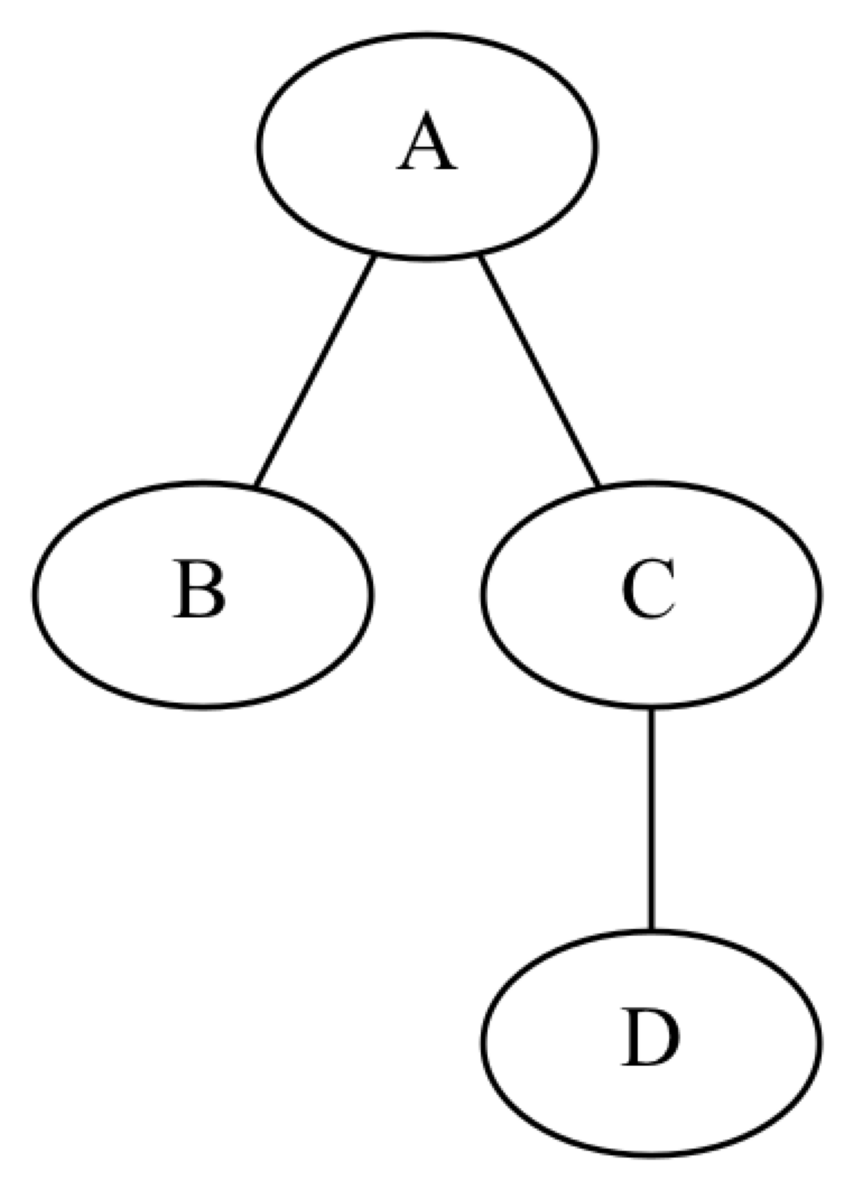

In [34]:
from causallearn.search.ConstraintBased.PC import pc
g_origimal = pc(data, indep_test="kci")

g_origimal.draw_pydot_graph(labels=labels)

# cg3 = pc(data2, indep_test="kci")

In [37]:
g_completeCase = pc(mcar2, indep_test="kci")
g_completeCase.draw_pydot_graph(labels=labels)


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

  0%|          | 0/4 [00:00<?, ?it/s]

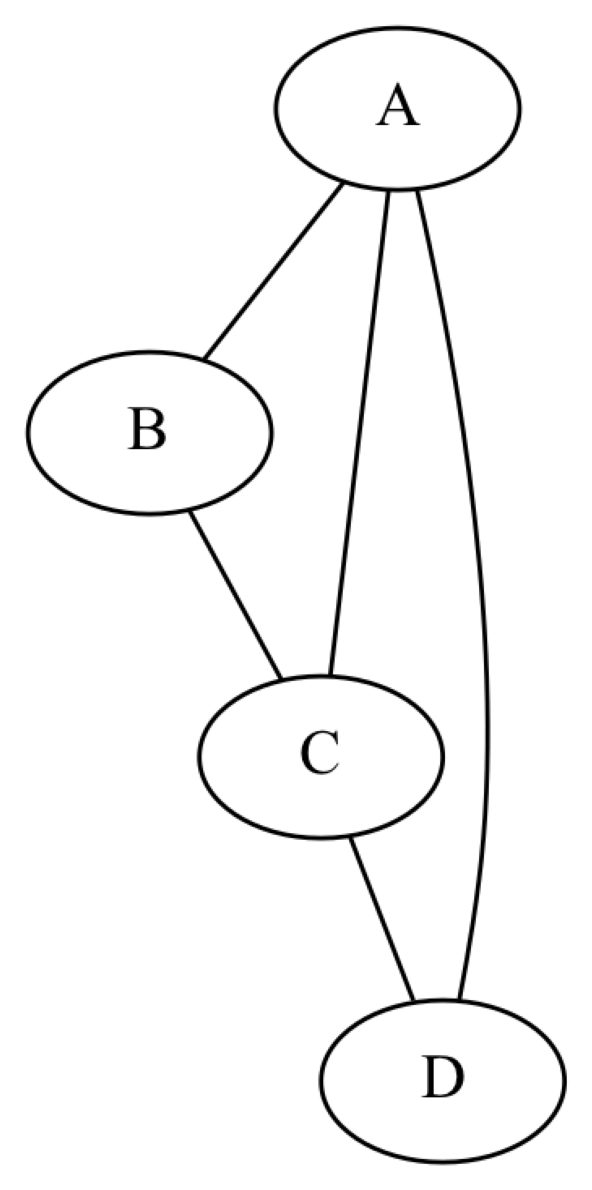

In [58]:
g_meanImp = pc(mean_imp, indep_test="kci")
g_meanImp.draw_pydot_graph(labels=labels)


  0%|          | 0/4 [00:00<?, ?it/s]

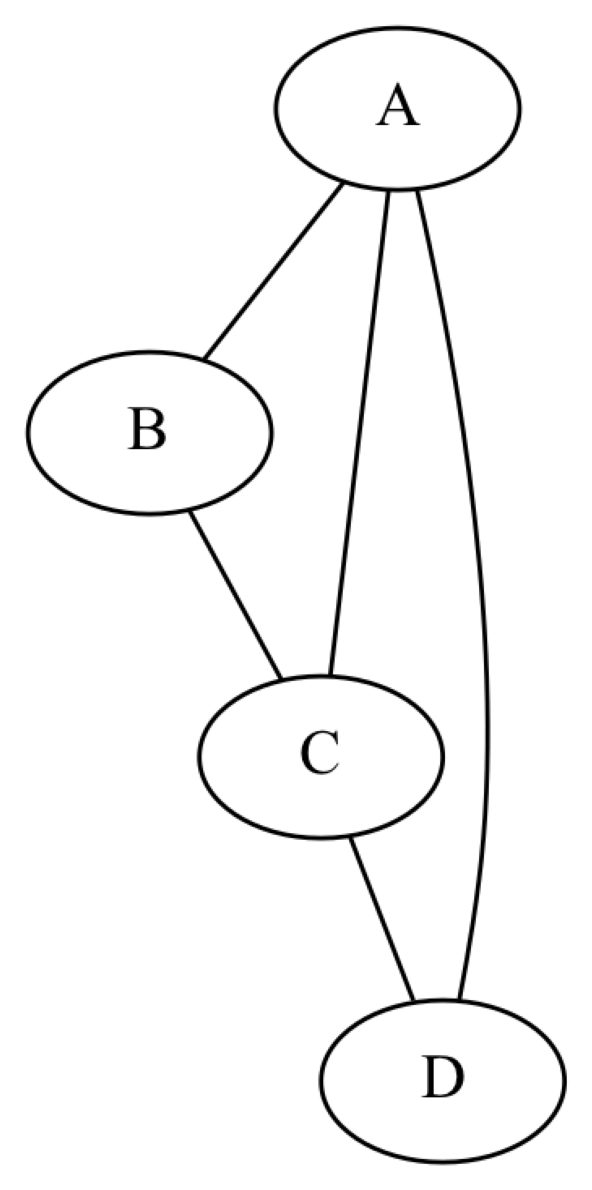

In [59]:
g_regrImp = pc(mean_imp, indep_test="kci")
g_regrImp.draw_pydot_graph(labels=labels)